In [1]:
import numpy as np

from question_answering.utils import core_qa_utils, generative_qa_utils
from question_answering.paths import generative_qa_paths

In [2]:
df_train, df_val, df_test = core_qa_utils.load_datasets_from_csv(
    generative_qa_paths.python_dataset_dir
)

df_test = np.array_split(df_test, 2)[0]

test_dataset = core_qa_utils.convert_dataframes_to_datasets(
    [df_test]
)[0]

c:\Users\Artur\.conda\envs\question_answering\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


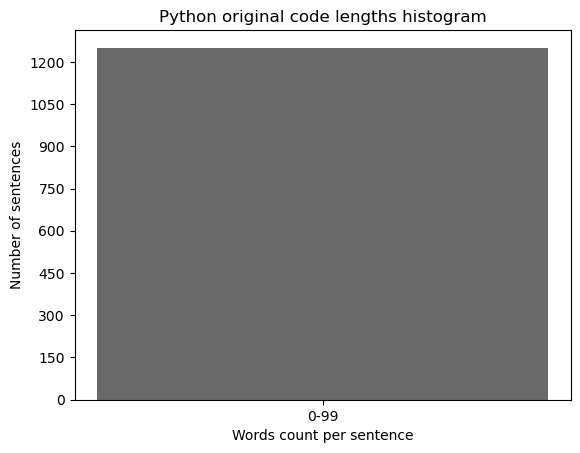

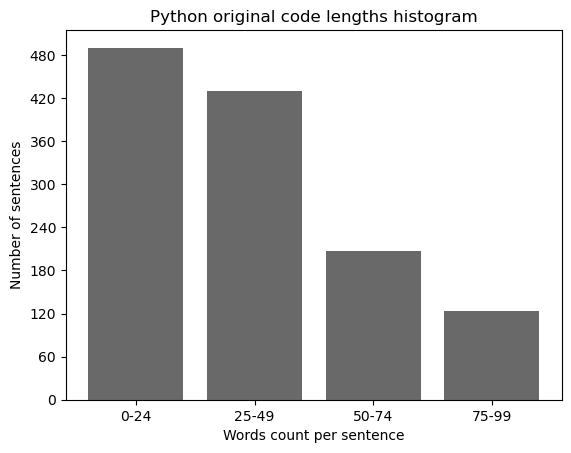

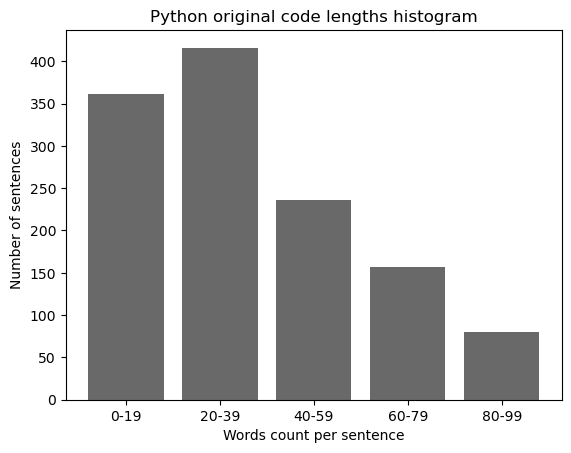

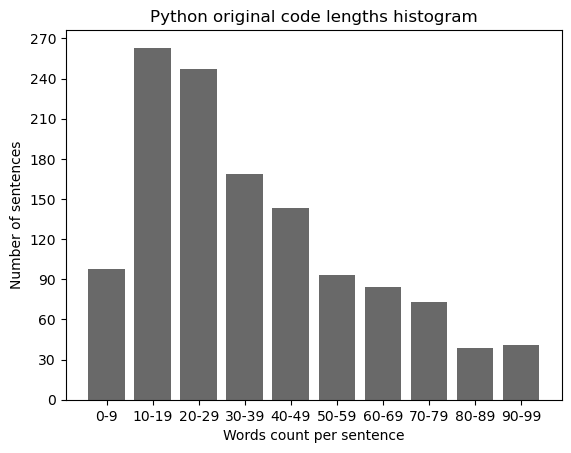

In [3]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_original_code_lengths_histogram_0_200_100.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=200,
    divider=100,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_original_code_lengths_histogram_0_100_25.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=25,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_original_code_lengths_histogram_0_100_20.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=20,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["original_code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_original_code_lengths_histogram_0_100_10.png",
    figure_title="Python original code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=10,
)

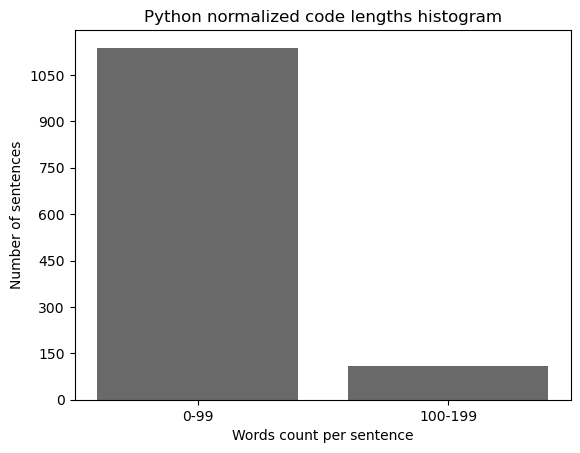

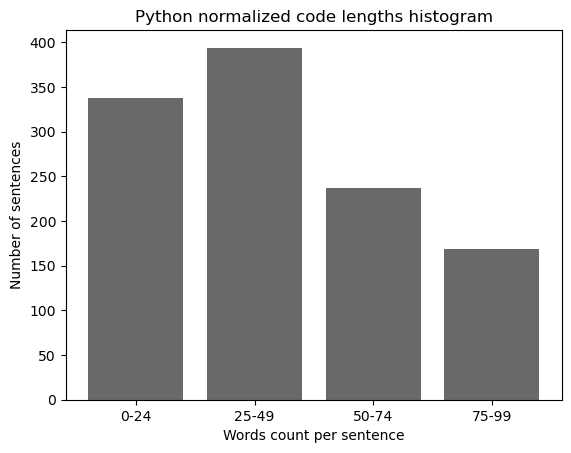

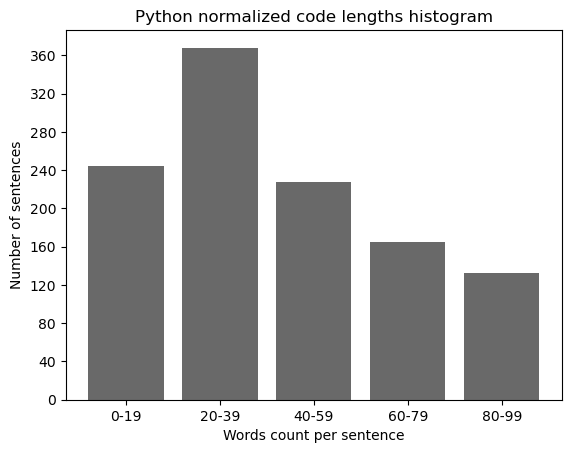

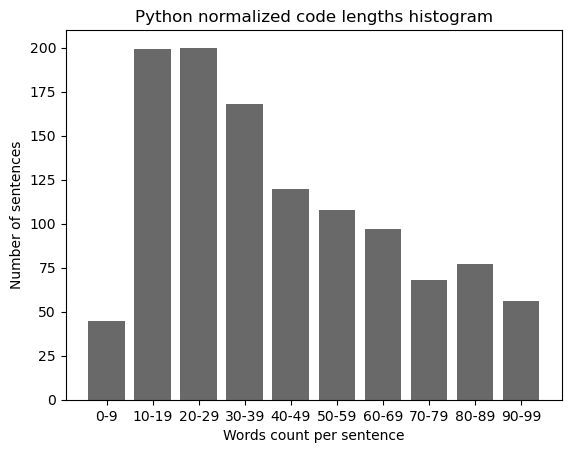

In [4]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_normalized_code_lengths_histogram_0_200_100.png",
    figure_title="Python normalized code lengths histogram",
    min_threshold=0,
    max_threshold=200,
    divider=100,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_normalized_code_lengths_histogram_0_100_25.png",
    figure_title="Python normalized code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=25,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_normalized_code_lengths_histogram_0_100_20.png",
    figure_title="Python normalized code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=20,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["code"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_normalized_code_lengths_histogram_0_100_10.png",
    figure_title="Python normalized code lengths histogram",
    min_threshold=0,
    max_threshold=100,
    divider=10,
)

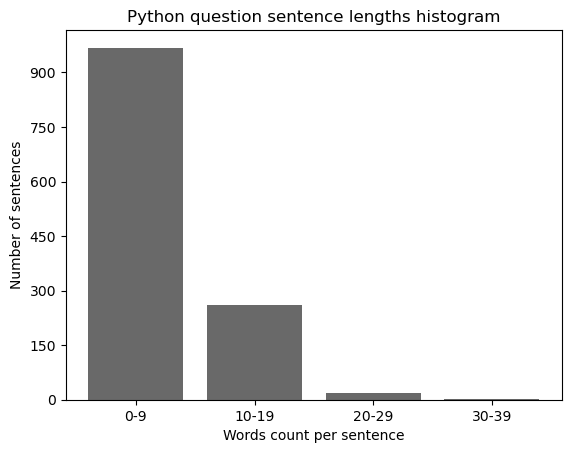

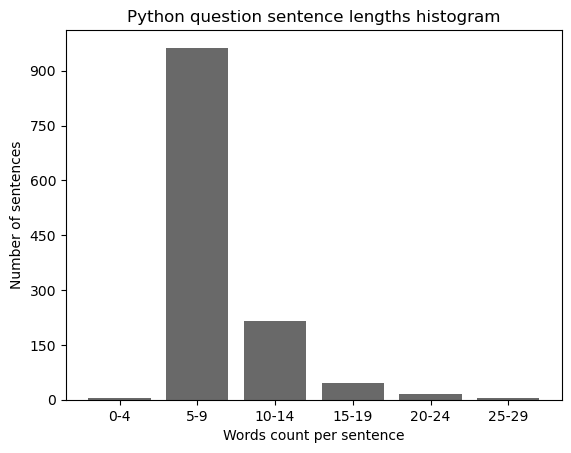

In [5]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["questions"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_question_sentence_lengths_histogram_0_50_10.png",
    figure_title="Python question sentence lengths histogram",
    min_threshold=0,
    max_threshold=50,
    divider=10,
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=test_dataset["questions"],
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_question_sentence_lengths_histogram_0_30_5.png",
    figure_title="Python question sentence lengths histogram",
    min_threshold=0,
    max_threshold=30,
    divider=5,
)

# Question types

In [6]:
question_numbers_per_type = generative_qa_utils.count_questions_per_question_type(test_dataset)

Filter:   0%|          | 0/1250 [00:00<?, ? examples/s]

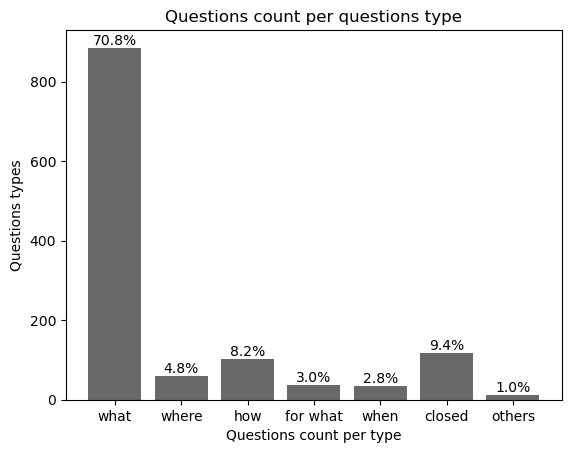

In [7]:
generative_qa_utils.plot_question_type_diagram(
    question_numbers_per_type=question_numbers_per_type,
    figure_path=generative_qa_paths.general_figures_dir
    / "test" / "test_python_question_numbers_per_questions_type.png"
    )